In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
spot_mini = 150
spot_maxi = 400
eqcp_mini = 225
eqcp_maxi = 550

In [18]:
eqcp_list = np.array([i for i in range(eqcp_mini,eqcp_maxi,5)])
spot_list = np.array([i for i in range(spot_mini,spot_maxi,5)])

In [27]:
def get_price(eqcp,spot):
    fix_spot = 0.25
    new_rebate = ( 0.35 if eqcp>=450 else 0.33 if eqcp>=350 else 0.31)
    new_price = eqcp * (1-new_rebate) * (1-fix_spot) + fix_spot * spot
    old_rebate = ( 0.30 if eqcp>=350 else 0.28)
    var_spot = 0.40 if (((1-old_rebate)*eqcp)>(spot-5)) else 0.
    old_price = eqcp * (1-old_rebate) * (1-var_spot) + var_spot*spot
    return new_price,old_price,new_rebate, old_rebate


In [24]:
eqcp = 497
spot = 260
n,o,nR,oR = get_price(eqcp=eqcp, spot=spot)
print(n,o,n-o,nR,oR)

307.2875 312.74 -5.452499999999986 0.35 0.3


In [25]:
df = pd.DataFrame(columns=eqcp_list)
for e in eqcp_list:
    pdS = pd.Series()
    for s in spot_list:
        n,o,_,_ = get_price(eqcp=e,spot=s)
        pdS[s] = int(o-n)
    df[e] = pdS
#df

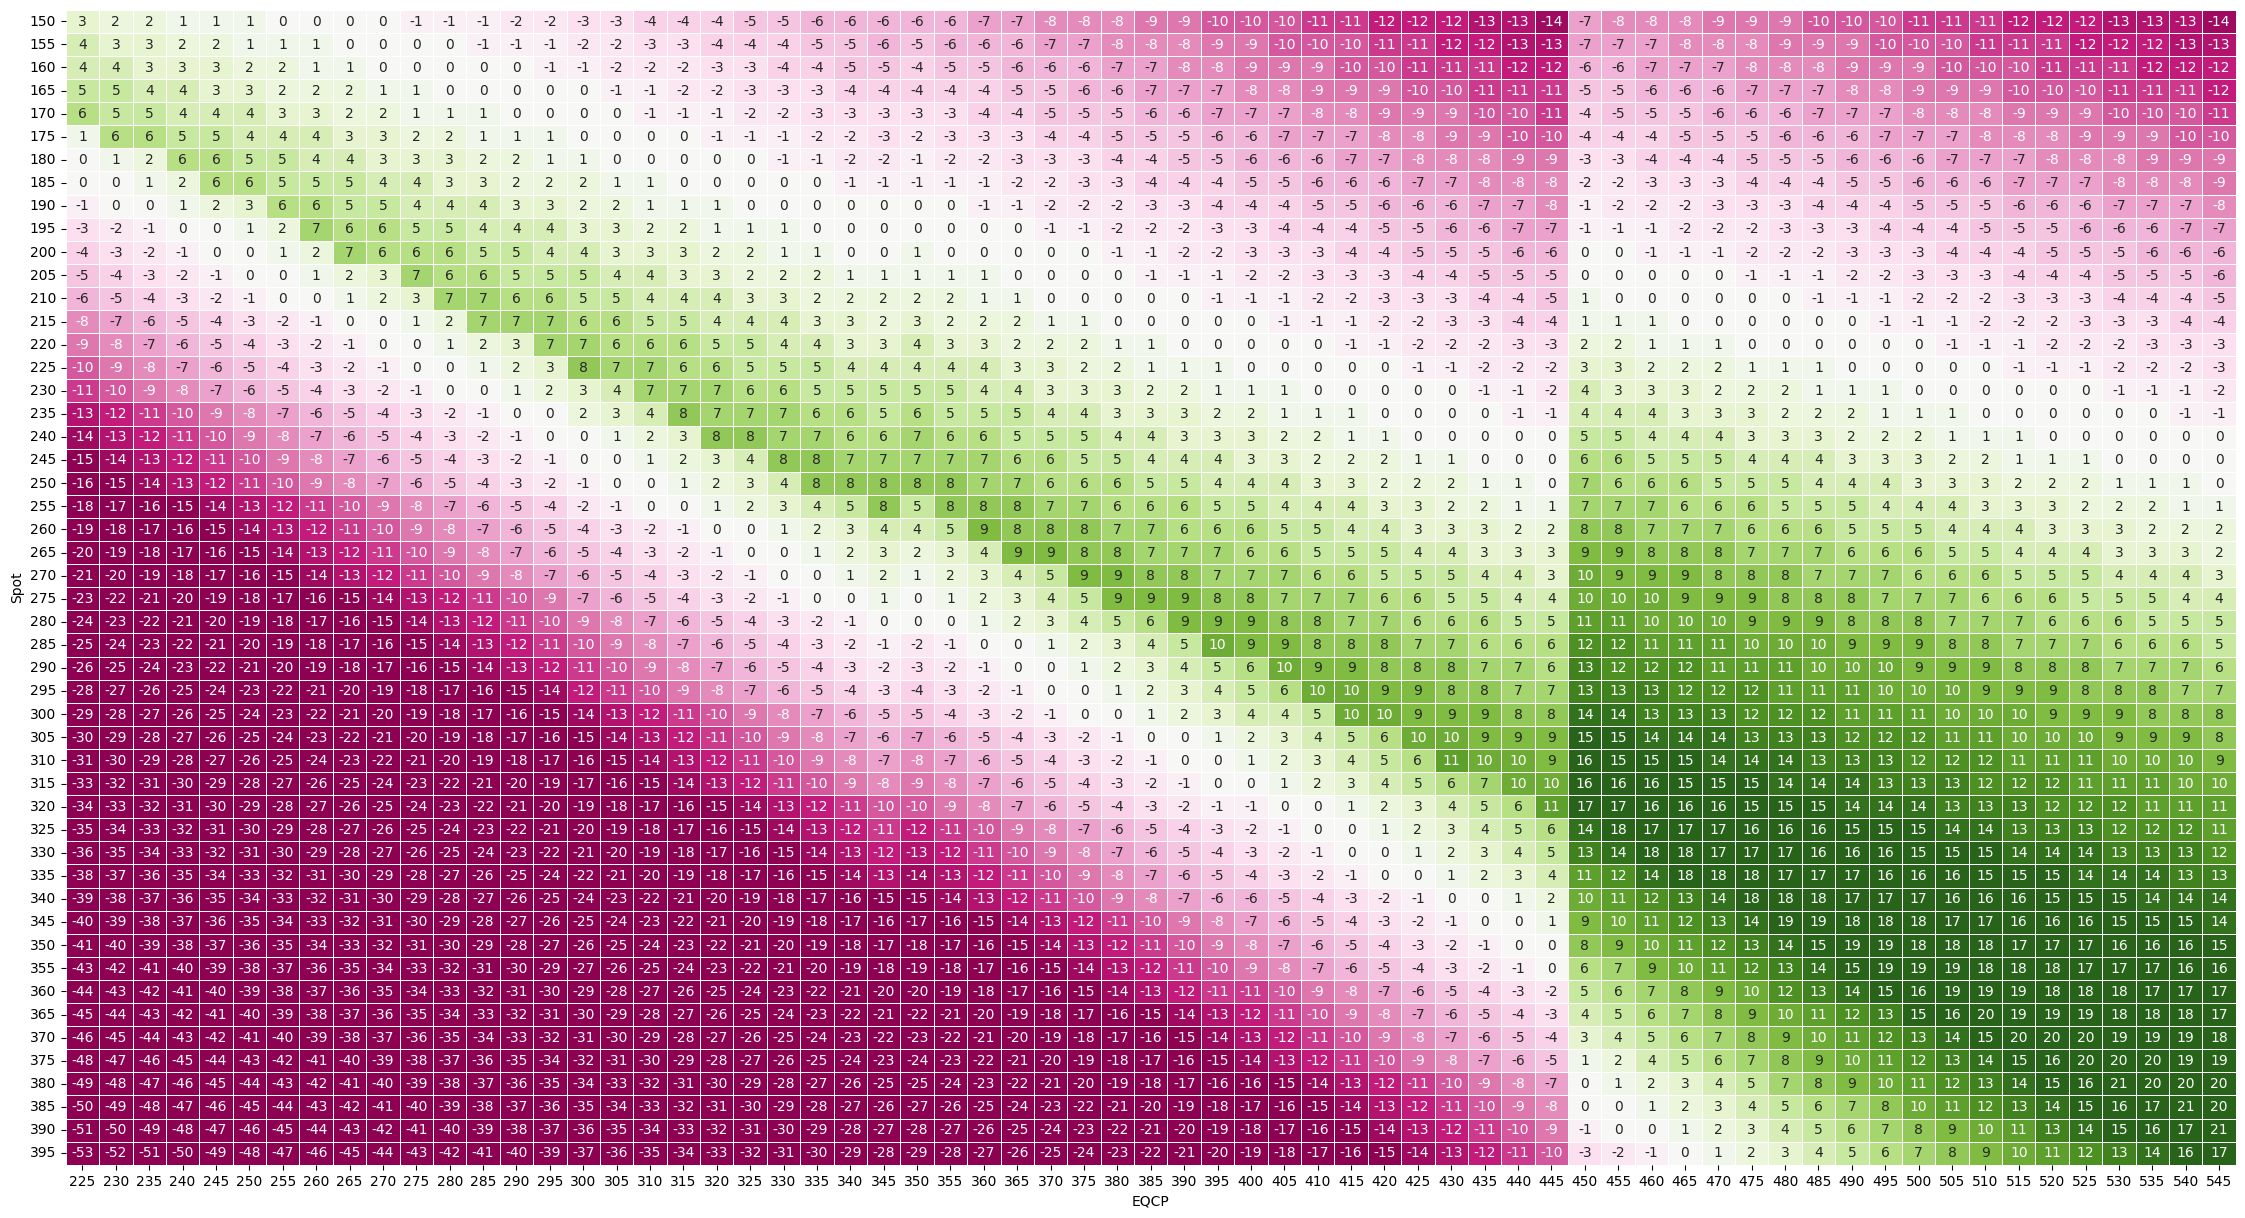

In [28]:
fig = plt.figure(figsize=(28,15))
sns.set_palette("Paired")
graphe = sns.heatmap(df,annot=True, linewidth=.5 ,cmap='PiYG', xticklabels=True, vmin=-15, vmax=15,cbar=False);
graphe.set_xlabel('EQCP');
graphe.set_ylabel('Spot');

In [7]:
geyser = sns.load_dataset("geyser")
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


<Figure size 2800x1500 with 0 Axes>

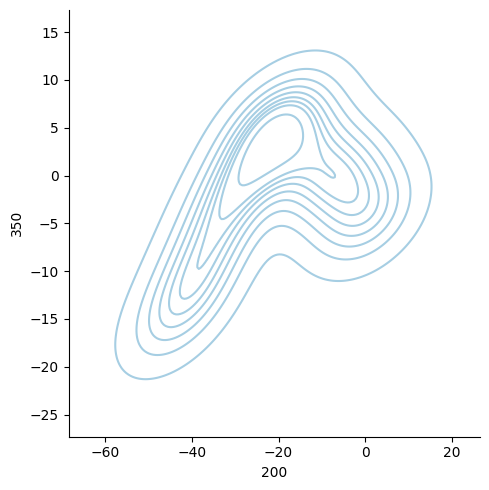

In [8]:
fig = plt.figure(figsize=(28,15))
sns.set_palette("Paired")
graphe2 = sns.displot(data=df, x=df[200], y=df[350], kind='kde');
